In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
#pip install pandas-profiling

In [6]:
import pandas_profiling as pf

In [7]:
pf.ProfileReport(df)

## Manual EDA

In [8]:
df.shape

(10683, 11)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dropna(how='any', inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

In [14]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [15]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

## Dep_time

In [16]:
# to convert to date time

df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [17]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


## Arrival Time

In [19]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

## Duration Time

In [21]:
duration = df['Duration'].str.split(' ',expand=True) # split duration based on the space' ' points
duration[1].fillna('0.00m',inplace=True) #fill all 'nan' with '0.00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [22]:
df.drop(['Duration'],axis=1,inplace=True)

## Count of Airlines

In [23]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airlines Vs Price

C:\Users\Velmurugan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

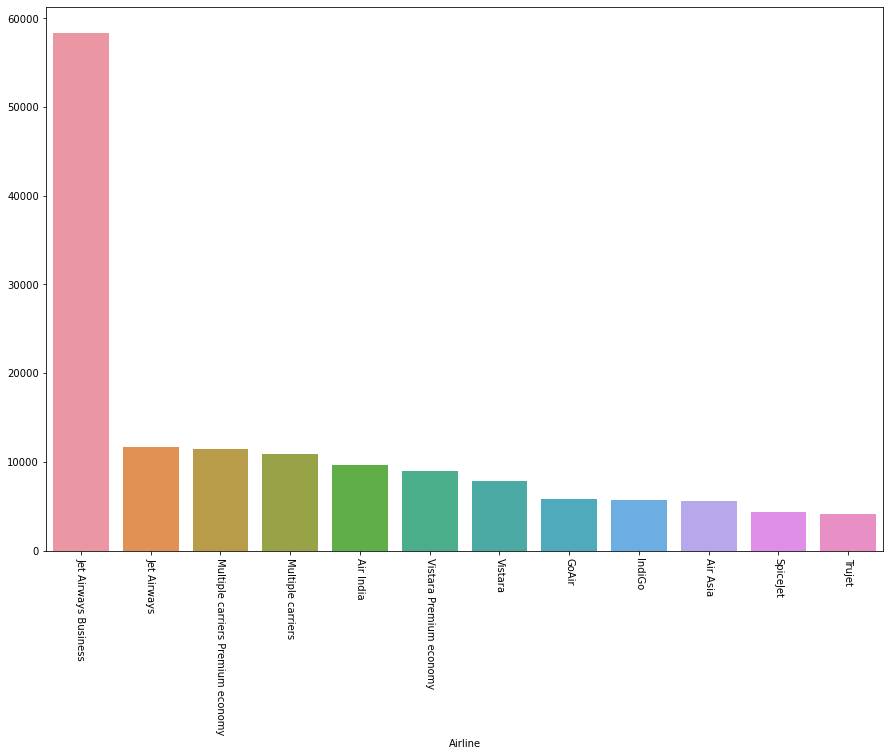

In [24]:
Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

<function matplotlib.pyplot.show(close=None, block=None)>

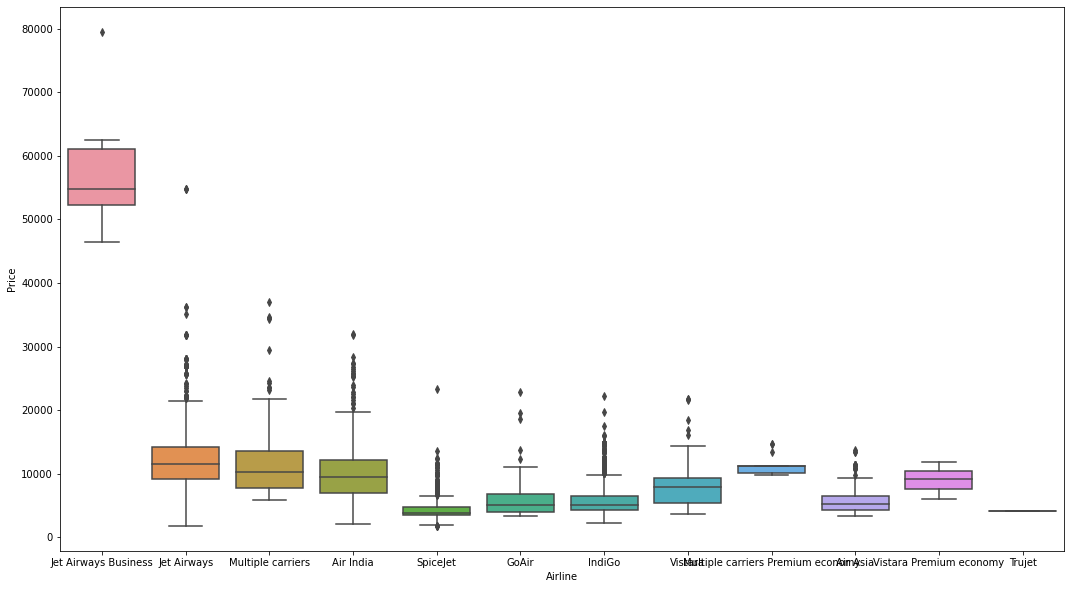

In [25]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

## Price based on number of stops

In [26]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

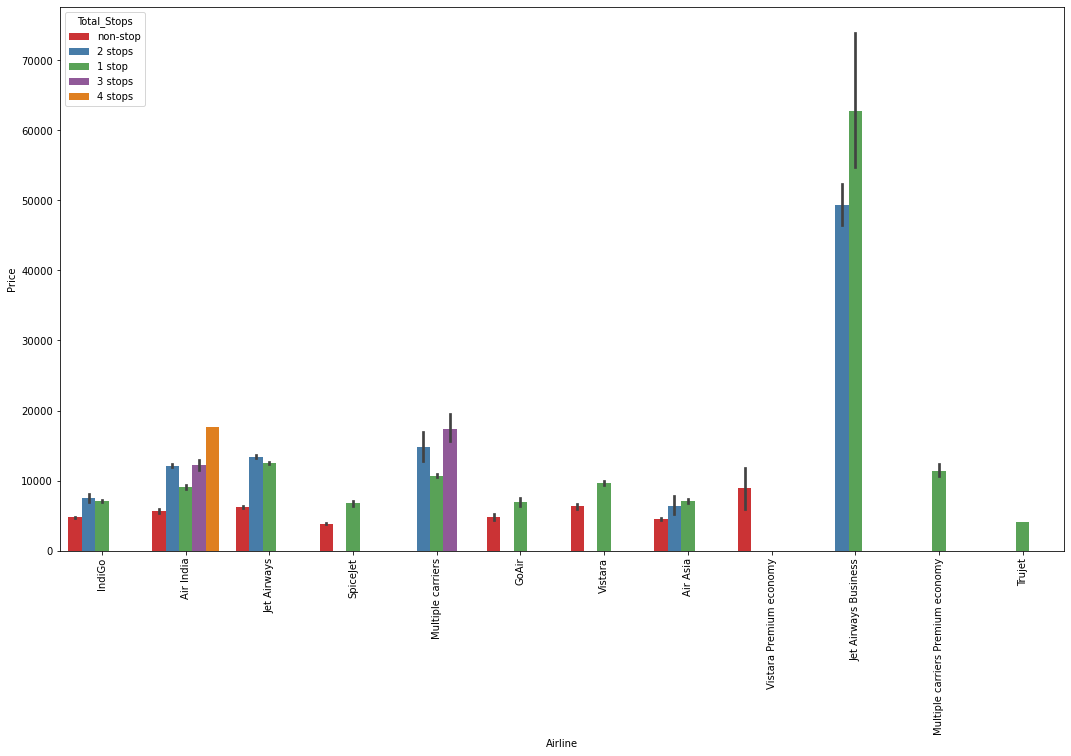

In [27]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [28]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## Source Vs Price

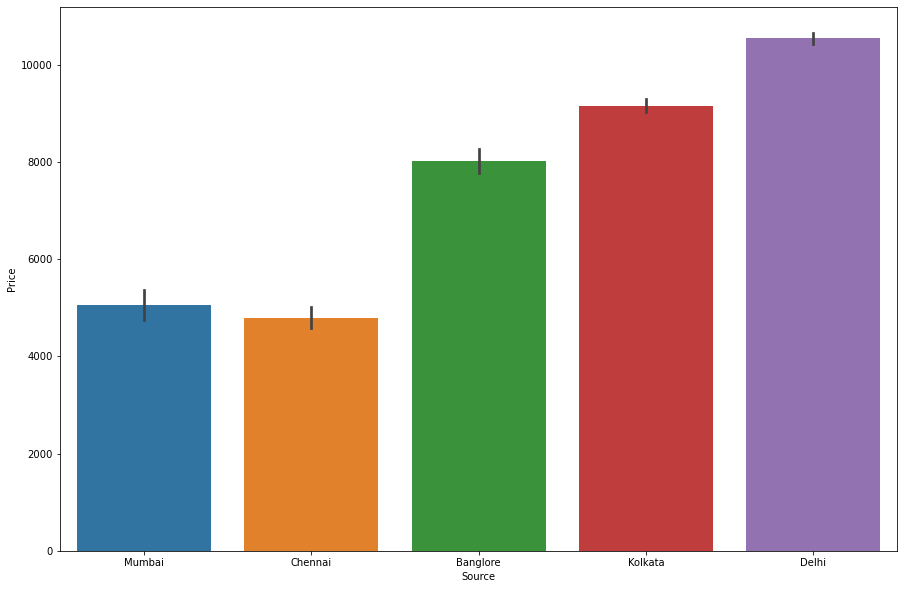

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='Source',y='Price',data=df.sort_values('Price',ascending=True))
plt.show()

## Destination Vs Price

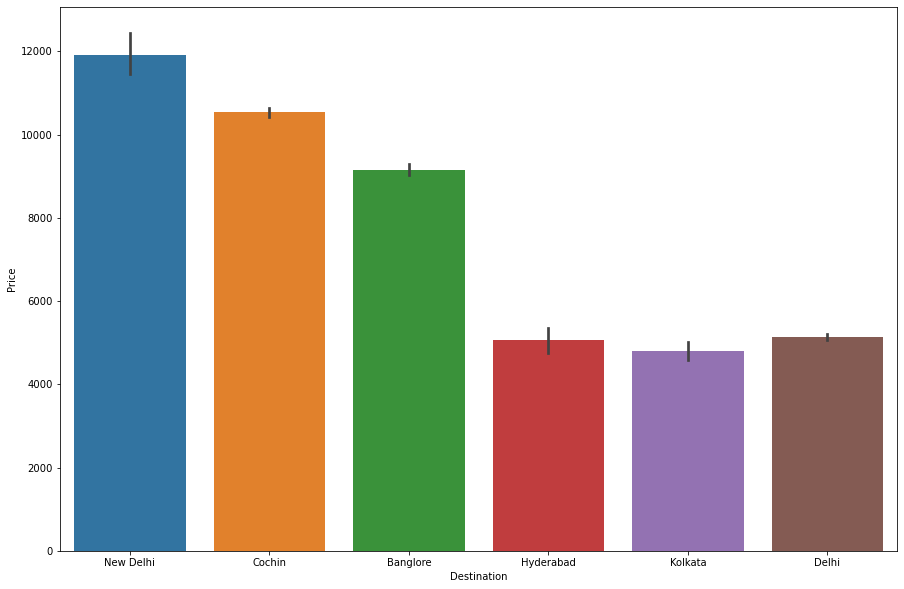

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

In [31]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [33]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

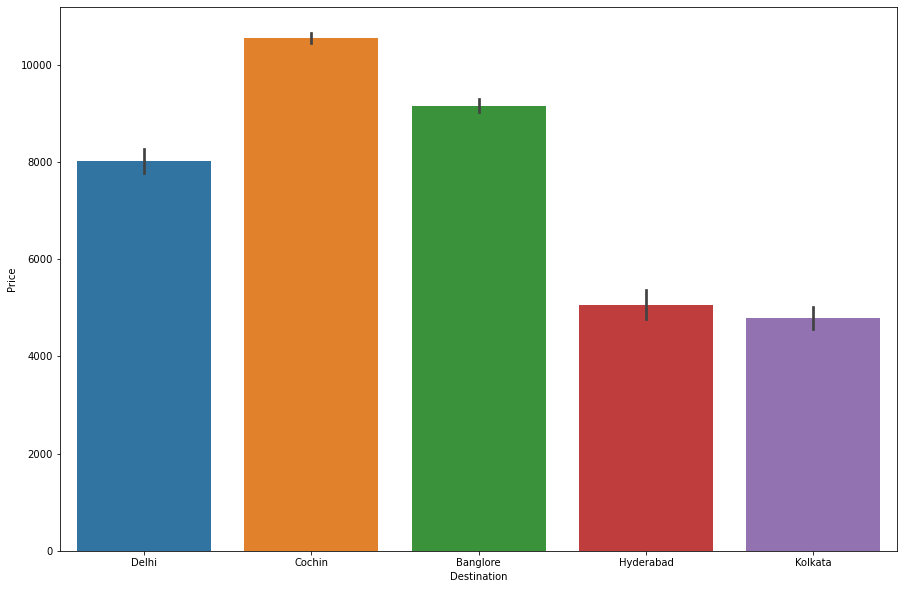

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

In [35]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0.00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:>

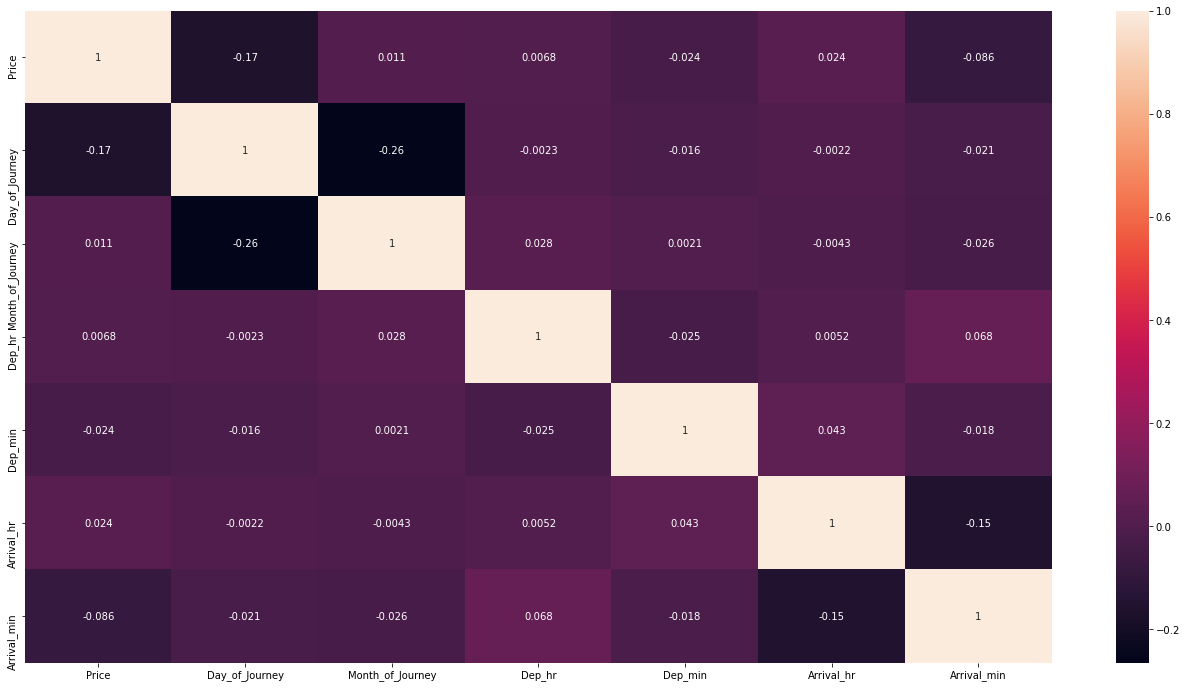

In [36]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

In [37]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_min              int64
Arrival_hr           int64
Arrival_min          int64
duration_hr         object
duration_min        object
dtype: object

## Apply one hot encoding on the categorical variables

In [38]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [39]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [40]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,0.00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [41]:
df.shape

(10682, 31)

# Test Data


In [42]:
df_test = pd.read_excel('Test_set.xlsx')

In [43]:
df_test.shape

(2671, 10)

In [44]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey'] = (df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey'] = (df_test['Date_of_Journey']).dt.month

In [46]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [47]:
# to convert to date time

df_test['Dep_hr'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

In [48]:
df_test['Arrival_hr'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [49]:
# Duration
duration_test = df_test['Duration'].str.split(' ',expand=True) # split duration based on the space' ' points
duration_test[1].fillna('0.00m',inplace=True) #fill all 'nan' with '0.00m'
df_test['duration_hr']=duration_test[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df_test['duration_min']=duration_test[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [50]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [51]:
for i in df_test:
    df_test.replace('New Delhi','Delhi',inplace=True)

In [52]:
df_test['Total_Stops'] = df_test['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
air_dummy_test=pd.get_dummies(df_test['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy_test=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy_test,source_dest_dummy_test,df_test],axis=1)

In [53]:
df_test.drop(['Airline','Source','Destination','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [54]:
df_test.shape

(2671, 30)

In [55]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Date_of_Journey', 'Route', 'Total_Stops', 'Additional_Info',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [56]:
df_test.shape

(2671, 30)

In [57]:
df.shape

(10682, 31)

In [58]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,0.00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [59]:
df.dtypes

Air India                             uint8
GoAir                                 uint8
IndiGo                                uint8
Jet Airways                           uint8
Jet Airways Business                  uint8
Multiple carriers                     uint8
Multiple carriers Premium economy     uint8
SpiceJet                              uint8
Trujet                                uint8
Vistara                               uint8
Vistara Premium economy               uint8
Source_Chennai                        uint8
Source_Delhi                          uint8
Source_Kolkata                        uint8
Source_Mumbai                         uint8
Destination_Cochin                    uint8
Destination_Delhi                     uint8
Destination_Hyderabad                 uint8
Destination_Kolkata                   uint8
Route                                object
Total_Stops                           int64
Additional_Info                      object
Price                           

In [60]:
X = df.drop(['Route','Additional_Info','Price'],axis=1)
y = df['Price']

In [61]:
X.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,0.00


## Model Building and Hyper parameter tuning

## Extra trees regressor

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [64]:
from sklearn.ensemble import ExtraTreesRegressor

ET_Model = ExtraTreesRegressor(n_estimators=120)
ET_Model.fit(X_train,y_train)
y_pred = ET_Model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test,y_pred)

0.7686914601357754

## Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
RF_Model = RandomForestRegressor()

In [69]:
RF_Model.fit(X_train,y_train)
y_predict = RF_Model.predict(X_test)

In [70]:
r2_score(y_test,y_predict)

0.7952391437405884

## Hyper Parameter

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
n_estimators = [int(x) for x in np.linspace(start=80,stop=1500,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6,45,num=5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

# Create Random grid

rand_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

rf = RandomForestRegressor()
rCV = RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42,n_jobs=1)

In [73]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [74]:
rf_pred = rCV.predict(X_test)
rf_pred

array([12616.81357177,  4291.35010823,  6155.44322374, ...,
       11638.37797033,  9681.71019181,  8652.64249643])

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [76]:
print('MAE :',mean_absolute_error(y_test,rf_pred))
print('MSE :',mean_squared_error(y_test,rf_pred))

MAE : 1156.984892072311
MSE : 3959978.425036666


In [77]:
r2_score(y_test,rf_pred)

0.8071471209153889

## Cat boost regressor

In [78]:
#pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
from catboost import CatBoostRegressor

In [80]:
    cat = CatBoostRegressor()

In [81]:
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 194ms	remaining: 3m 13s
1:	learn: 4319.1952920	total: 204ms	remaining: 1m 41s
2:	learn: 4170.0874200	total: 210ms	remaining: 1m 9s
3:	learn: 4033.1061207	total: 214ms	remaining: 53.3s
4:	learn: 3909.5332929	total: 219ms	remaining: 43.6s
5:	learn: 3788.8771850	total: 223ms	remaining: 37s
6:	learn: 3677.5795256	total: 229ms	remaining: 32.4s
7:	learn: 3585.9715553	total: 233ms	remaining: 28.9s
8:	learn: 3499.6424958	total: 238ms	remaining: 26.2s
9:	learn: 3408.9602975	total: 243ms	remaining: 24s
10:	learn: 3329.4018172	total: 248ms	remaining: 22.3s
11:	learn: 3258.4306577	total: 252ms	remaining: 20.8s
12:	learn: 3188.9732731	total: 257ms	remaining: 19.5s
13:	learn: 3126.6519374	total: 262ms	remaining: 18.4s
14:	learn: 3064.8092738	total: 267ms	remaining: 17.5s
15:	learn: 3011.9738031	total: 271ms	remaining: 16.7s
16:	learn: 2960.0953295	total: 277ms	remaining: 16s
17:	learn: 2917.5532184	total: 281ms	remaining: 15.3s
18:	learn: 28

183:	learn: 1904.6147159	total: 1.05s	remaining: 4.65s
184:	learn: 1903.7135890	total: 1.05s	remaining: 4.64s
185:	learn: 1902.4011221	total: 1.06s	remaining: 4.64s
186:	learn: 1901.0717891	total: 1.06s	remaining: 4.63s
187:	learn: 1899.6407868	total: 1.07s	remaining: 4.62s
188:	learn: 1898.5577875	total: 1.07s	remaining: 4.61s
189:	learn: 1897.2225162	total: 1.08s	remaining: 4.59s
190:	learn: 1895.2033936	total: 1.08s	remaining: 4.58s
191:	learn: 1893.4908193	total: 1.09s	remaining: 4.58s
192:	learn: 1893.0729664	total: 1.09s	remaining: 4.56s
193:	learn: 1891.4099192	total: 1.09s	remaining: 4.55s
194:	learn: 1890.6753302	total: 1.1s	remaining: 4.54s
195:	learn: 1889.7612651	total: 1.1s	remaining: 4.53s
196:	learn: 1889.0516784	total: 1.11s	remaining: 4.52s
197:	learn: 1887.9756826	total: 1.11s	remaining: 4.51s
198:	learn: 1886.5853132	total: 1.12s	remaining: 4.49s
199:	learn: 1885.2670134	total: 1.12s	remaining: 4.49s
200:	learn: 1884.9171654	total: 1.13s	remaining: 4.47s
201:	learn: 

365:	learn: 1700.6380273	total: 1.88s	remaining: 3.26s
366:	learn: 1698.9732681	total: 1.89s	remaining: 3.25s
367:	learn: 1698.4934176	total: 1.89s	remaining: 3.25s
368:	learn: 1697.8317250	total: 1.89s	remaining: 3.24s
369:	learn: 1697.6146189	total: 1.9s	remaining: 3.23s
370:	learn: 1696.4908709	total: 1.9s	remaining: 3.23s
371:	learn: 1695.3707016	total: 1.91s	remaining: 3.22s
372:	learn: 1694.4249800	total: 1.91s	remaining: 3.21s
373:	learn: 1692.8636708	total: 1.92s	remaining: 3.21s
374:	learn: 1691.9105426	total: 1.92s	remaining: 3.2s
375:	learn: 1691.0001079	total: 1.93s	remaining: 3.2s
376:	learn: 1689.3539822	total: 1.93s	remaining: 3.19s
377:	learn: 1688.5976712	total: 1.94s	remaining: 3.19s
378:	learn: 1687.3608479	total: 1.94s	remaining: 3.18s
379:	learn: 1687.2498993	total: 1.94s	remaining: 3.17s
380:	learn: 1686.3166885	total: 1.95s	remaining: 3.17s
381:	learn: 1685.3745620	total: 1.95s	remaining: 3.16s
382:	learn: 1685.3653260	total: 1.96s	remaining: 3.15s
383:	learn: 16

537:	learn: 1582.0557037	total: 2.72s	remaining: 2.34s
538:	learn: 1581.2143040	total: 2.73s	remaining: 2.33s
539:	learn: 1580.4380867	total: 2.73s	remaining: 2.33s
540:	learn: 1579.5303061	total: 2.74s	remaining: 2.32s
541:	learn: 1578.8410565	total: 2.74s	remaining: 2.32s
542:	learn: 1578.1809600	total: 2.75s	remaining: 2.31s
543:	learn: 1577.7203095	total: 2.75s	remaining: 2.31s
544:	learn: 1577.7129904	total: 2.76s	remaining: 2.31s
545:	learn: 1577.2242673	total: 2.77s	remaining: 2.3s
546:	learn: 1576.5582277	total: 2.77s	remaining: 2.29s
547:	learn: 1576.1212833	total: 2.78s	remaining: 2.29s
548:	learn: 1575.8786560	total: 2.78s	remaining: 2.29s
549:	learn: 1575.2344320	total: 2.79s	remaining: 2.28s
550:	learn: 1575.1915938	total: 2.79s	remaining: 2.28s
551:	learn: 1574.2996311	total: 2.8s	remaining: 2.27s
552:	learn: 1573.5210742	total: 2.8s	remaining: 2.27s
553:	learn: 1572.7087063	total: 2.81s	remaining: 2.26s
554:	learn: 1572.1456153	total: 2.81s	remaining: 2.25s
555:	learn: 1

716:	learn: 1488.7996804	total: 3.56s	remaining: 1.41s
717:	learn: 1488.6740871	total: 3.56s	remaining: 1.4s
718:	learn: 1488.2827462	total: 3.57s	remaining: 1.39s
719:	learn: 1488.0238320	total: 3.57s	remaining: 1.39s
720:	learn: 1487.3662632	total: 3.58s	remaining: 1.38s
721:	learn: 1486.8443457	total: 3.58s	remaining: 1.38s
722:	learn: 1485.9918883	total: 3.59s	remaining: 1.37s
723:	learn: 1485.6340797	total: 3.59s	remaining: 1.37s
724:	learn: 1484.9905478	total: 3.6s	remaining: 1.36s
725:	learn: 1484.4843779	total: 3.6s	remaining: 1.36s
726:	learn: 1484.1954503	total: 3.6s	remaining: 1.35s
727:	learn: 1483.6560772	total: 3.61s	remaining: 1.35s
728:	learn: 1483.6536038	total: 3.61s	remaining: 1.34s
729:	learn: 1483.1775397	total: 3.62s	remaining: 1.34s
730:	learn: 1482.7431368	total: 3.62s	remaining: 1.33s
731:	learn: 1482.2211218	total: 3.63s	remaining: 1.33s
732:	learn: 1481.4104156	total: 3.63s	remaining: 1.32s
733:	learn: 1481.0754196	total: 3.64s	remaining: 1.32s
734:	learn: 14

901:	learn: 1423.8482508	total: 4.4s	remaining: 478ms
902:	learn: 1423.6212016	total: 4.41s	remaining: 473ms
903:	learn: 1423.2905391	total: 4.41s	remaining: 469ms
904:	learn: 1423.1176866	total: 4.42s	remaining: 464ms
905:	learn: 1423.1143925	total: 4.42s	remaining: 459ms
906:	learn: 1422.5288896	total: 4.42s	remaining: 454ms
907:	learn: 1422.2110598	total: 4.43s	remaining: 449ms
908:	learn: 1421.7953912	total: 4.43s	remaining: 444ms
909:	learn: 1421.6991174	total: 4.44s	remaining: 439ms
910:	learn: 1421.5456320	total: 4.44s	remaining: 434ms
911:	learn: 1421.3602840	total: 4.45s	remaining: 429ms
912:	learn: 1421.0583839	total: 4.45s	remaining: 424ms
913:	learn: 1420.5044573	total: 4.46s	remaining: 420ms
914:	learn: 1420.0678475	total: 4.46s	remaining: 415ms
915:	learn: 1419.9380979	total: 4.47s	remaining: 410ms
916:	learn: 1419.9358459	total: 4.47s	remaining: 405ms
917:	learn: 1419.5650873	total: 4.48s	remaining: 400ms
918:	learn: 1419.3920275	total: 4.48s	remaining: 395ms
919:	learn:

In [82]:
cat_pred = cat.predict(X_test)

In [83]:
r2_score(y_test,cat_pred)

0.8301928561140887

## Light GBM Regressor

In [84]:
#pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [85]:
X_train[['duration_hr','duration_min']] = X_train[['duration_hr','duration_min']].astype(float)
X_test[['duration_hr','duration_min']] = X_test[['duration_hr','duration_min']].astype(float)

In [86]:
from lightgbm import LGBMRegressor

In [87]:
lgb_model = LGBMRegressor()

In [88]:
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [89]:
lgb_pred = lgb_model.predict(X_test)

In [90]:
r2_score(y_test,lgb_pred)

0.8030064936005559

## XG Boost Regressor

In [91]:
!pip install xgboost

In [92]:
import xgboost as xgb

In [93]:
xgb_model = xgb.XGBRFRegressor(n_estimators=150)

In [94]:
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=4, num_parallel_tree=150,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [95]:
xgb_pred = xgb_model.predict(X_test)

In [96]:
r2_score(y_test,xgb_pred)

0.7220075659406066

In [99]:
# #Use pickle to save our model so that we can use it later

import pickle 
 # Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [100]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [101]:
deploy_df = df.drop(['Route','Additional_Info'],axis=1)

In [102]:
deploy_df.to_csv('deploy_df')

In [103]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,0.00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [104]:
df.dtypes

Air India                             uint8
GoAir                                 uint8
IndiGo                                uint8
Jet Airways                           uint8
Jet Airways Business                  uint8
Multiple carriers                     uint8
Multiple carriers Premium economy     uint8
SpiceJet                              uint8
Trujet                                uint8
Vistara                               uint8
Vistara Premium economy               uint8
Source_Chennai                        uint8
Source_Delhi                          uint8
Source_Kolkata                        uint8
Source_Mumbai                         uint8
Destination_Cochin                    uint8
Destination_Delhi                     uint8
Destination_Hyderabad                 uint8
Destination_Kolkata                   uint8
Route                                object
Total_Stops                           int64
Additional_Info                      object
Price                           